[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/serdna1/ODIR-5K-multi-label-classification/blob/main/experiments/experiment_12/experiment_12.ipynb)

# Download GitHub repository and data
The repo wont be downloading in my local machine, since i already have it there. It will if someone is running this notebook on their own machine, colab, ...

In [ ]:
import os
import zipfile

images_path = 'ODIR-5K-multi-label-classification/data/images/'

# If the experiments folder doesnt exist im not in my local machine
if not os.path.exists('../../experiments'):
    # Clone project repository
    !git clone https://github.com/serdna1/ODIR-5K-multi-label-classification.git

    # Unzip images
    with zipfile.ZipFile(f'{images_path}/train_fov_cc_fov_224.zip', 'r') as zip_ref:
      print("Unzipping training images...")
      zip_ref.extractall(f'{images_path}/train_fov_cc_fov_224')
    !rm ODIR-5K-multi-label-classification/data/images/train_fov_cc_fov_224.zip
    !rm ODIR-5K-multi-label-classification/data/images/train_224.zip

    # Move to the experiment folder
    %cd ODIR-5K-multi-label-classification/experiments/experiment_12/

Cloning into 'ODIR-5K-multi-label-classification'...
remote: Enumerating objects: 561, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 561 (delta 19), reused 36 (delta 9), pack-reused 510
Receiving objects: 100% (561/561), 91.48 MiB | 31.32 MiB/s, done.
Resolving deltas: 100% (272/272), done.
Updating files: 100% (71/71), done.
Unzipping training images...
/content/ODIR-5K-multi-label-classification/experiments/experiment_12


# Drop some special patients from the dataset
The background of some images is quite different from the rest ones. Therefore they wont be used for training.

Text(0.5, 1.0, 'Example of special image')

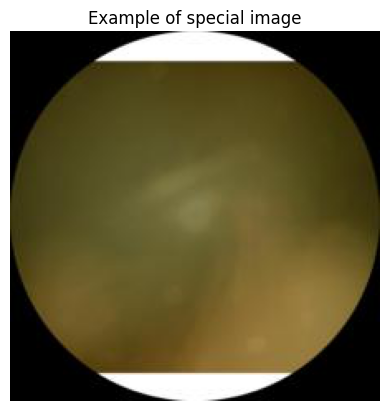

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

images_path = '../../data/images/train_fov_cc_fov_224'

special_images = ['2174_right.jpg', '2175_left.jpg', '2176_left.jpg', '2177_left.jpg',
                  '2177_right.jpg', '2178_right.jpg', '2179_left.jpg', '2179_right.jpg',
                  '2180_left.jpg', '2180_right.jpg', '2181_left.jpg', '2181_right.jpg',
                  '2182_left.jpg', '2182_right.jpg', '2957_left.jpg', '2957_right.jpg']

# Show one of this special images
image_path = f'{images_path}/{special_images[7]}'
img = Image.open(image_path)
plt.imshow(img)
plt.axis(False)
plt.title('Example of special image')

In [ ]:
import pandas as pd

original_annotations_path = '../../data/annotations/annotations.xlsx'
annotations_path = 'data/annotations.xlsx'

odir_df = pd.read_excel(original_annotations_path)

patients_to_drop_df = odir_df[odir_df['Left-Fundus'].isin(special_images) | odir_df['Right-Fundus'].isin(special_images)]
patients_to_drop_df # This are all the patients with one ore more of this spetial images

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
1634,2174,65,Female,2174_left.jpg,2174_right.jpg,normal fundus,cataract,0,0,0,1,0,0,0,0
1635,2175,63,Male,2175_left.jpg,2175_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1636,2176,82,Female,2176_left.jpg,2176_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0
1637,2177,87,Male,2177_left.jpg,2177_right.jpg,normal fundus，lens dust,cataract,0,0,0,1,0,0,0,0
1638,2178,84,Male,2178_left.jpg,2178_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0
1639,2179,70,Female,2179_left.jpg,2179_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0
1640,2180,66,Female,2180_left.jpg,2180_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0
1641,2181,79,Female,2181_left.jpg,2181_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0
1642,2182,70,Male,2182_left.jpg,2182_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0
2334,2957,62,Female,2957_left.jpg,2957_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0


In [ ]:
from pathlib import Path

experiment_data_path = 'data/'

print(f'Annotations length before droping the rows with the special images: {len(odir_df)}')

odir_df = odir_df.drop(patients_to_drop_df.index) # Drop the special patients
Path(experiment_data_path).mkdir(parents=True, exist_ok=True) # Create the experiment data folder
odir_df.to_excel(annotations_path) # Save annotations without the special patients

print(f'Annotations length after droping the rows with the special images: {len(odir_df)}')

Annotations length before droping the rows with the special images: 3500
Annotations length after droping the rows with the special images: 3490


# Check dataset label distribution

Text(0.5, 1.0, 'Label distribution')

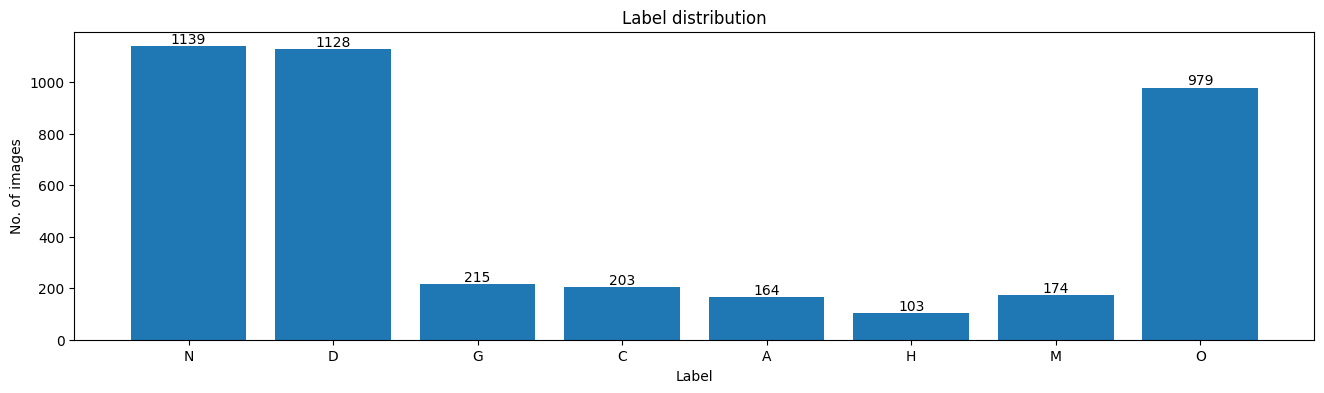

In [ ]:
label_names = ['N','D','G','C','A','H','M','O']

total_label_list = []
for label in label_names:
    total_label = int(odir_df.loc[:, [label]].sum())
    total_label_list.append(total_label)

plt.figure(figsize=(16,4))

bar = plt.bar(label_names, total_label_list)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.xlabel(f'Label')
plt.ylabel(f'No. of images')
plt.title(f'Label distribution')

# Split dataset into train and validation

In [ ]:
os.chdir('../../scripts/')
from utils import split_annotations
os.chdir('../experiments/experiment_12/')

In [ ]:
# Split the original annotations file into train and validation annotations files
# val_ratio = 0.2 (value by default)
split_annotations(annotations_path, experiment_data_path, test_split=False)

# Read the previous three created .xlsx files into dataframes
train_df = pd.read_excel(f'{experiment_data_path}/train_annotations.xlsx')
val_df = pd.read_excel(f'{experiment_data_path}/val_annotations.xlsx')

len(train_df), len(val_df)

(2792, 698)

# Check train and validation datasets label distribution

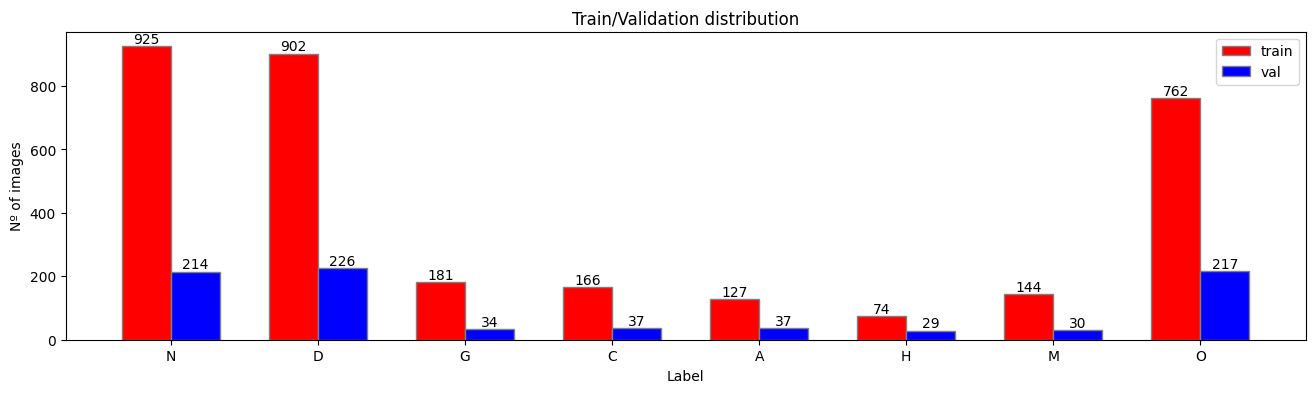

In [ ]:
import numpy as np

barWidth = 0.3333
fig = plt.subplots(figsize =(16, 4))

# Set height of bars
total_label_train_list = [int(train_df.loc[:, [label]].sum()) for label in label_names]
total_label_val_list = [int(val_df.loc[:, [label]].sum()) for label in label_names]

# Set position of bar on X axis
br_train = np.arange(len(label_names))
br_val = [x + barWidth for x in br_train]

# Make the plot
bar_train = plt.bar(br_train, total_label_train_list, color ='r', width = barWidth,
                    edgecolor ='grey', label ='train')
bar_val = plt.bar(br_val, total_label_val_list, color ='b', width = barWidth,
                  edgecolor ='grey', label ='val')

# Plot the height label on top of each bar
for bar in [bar_train, bar_val]:
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

plt.title(f'Train/Validation distribution')
plt.xlabel('Label')
plt.ylabel('Nº of images')
plt.xticks([r + barWidth/2 for r in range(len(total_label_train_list))], label_names)

plt.legend()
plt.show()

# Train the model

In [ ]:
%run ../../scripts/train.py -h # Run this line to check the train script arguments

usage: train.py [-h] [--random_seed RANDOM_SEED] [--model_name MODEL_NAME]
                [--images_path IMAGES_PATH] [--use_data_augmentation]
                [--use_normalization]
                [--train_annotations_path TRAIN_ANNOTATIONS_PATH]
                [--val_annotations_path VAL_ANNOTATIONS_PATH]
                [--batch_size BATCH_SIZE]
                [--use_multilabel_balanced_random_sampler]
                [--num_workers NUM_WORKERS] [--use_weighted_loss] [--lr LR]
                [--momentum MOMENTUM] [--lr_scheduler LR_SCHEDULER]
                [--linear_lr_scheduler_total_iters LINEAR_LR_SCHEDULER_TOTAL_ITERS]
                [--linear_lr_scheduler_start_factor LINEAR_LR_SCHEDULER_START_FACTOR]
                [--linear_lr_scheduler_end_factor LINEAR_LR_SCHEDULER_END_FACTOR]
                [--cyclic_lr_scheduler_base_lr CYCLIC_LR_SCHEDULER_BASE_LR]
                [--cyclic_lr_scheduler_max_lr CYCLIC_LR_SCHEDULER_MAX_LR]
                [--cyclic_lr_scheduler_ste

In [ ]:
# Arguments that will be passed to the train script
images_path = '../../data/images/train_fov_cc_fov_224'
train_annotations_path = 'data/train_annotations.xlsx'
val_annotations_path = 'data/val_annotations.xlsx'
lr = 0.05
lr_scheduler = 'LinearLR'
batch_size = 32
epochs = 100
patience = 20
experiment_name = 'experiment_12'

In [ ]:
%run ../../scripts/train.py --images_path {images_path} --train_annotations_path {train_annotations_path} --val_annotations_path {val_annotations_path}\
                            --batch_size {batch_size} --epochs {epochs} --patience {patience} --experiment_name {experiment_name} --use_normalization\
                            --lr {lr} --lr_scheduler {lr_scheduler} --use_multilabel_balanced_random_sampler

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 393MB/s]


[INFO] Created new resnet50_dual model.
[INFO] Created SummaryWriter, saving to: ../runs/resnet50_dual/experiment_12...


  0%|          | 0/100 [00:00<?, ?it/s]

Ep: 0 | t_loss: 0.3573 | t_kappa: 0.0278 | t_f1: 0.0788 | t_auc: 0.5970 | t_final: 0.2345 | v_loss: 0.3437 | v_kappa: 0.0671 | v_f1: 0.1532 | v_auc: 0.6366 | v_final: 0.2857
Validation loss decreased (inf --> 0.343732).  Saving model ...
Ep: 1 | t_loss: 0.3025 | t_kappa: 0.1463 | t_f1: 0.2374 | t_auc: 0.7317 | t_final: 0.3718 | v_loss: 0.3313 | v_kappa: 0.1756 | v_f1: 0.2309 | v_auc: 0.6571 | v_final: 0.3545
Validation loss decreased (0.343732 --> 0.331320).  Saving model ...
Ep: 2 | t_loss: 0.2835 | t_kappa: 0.2292 | t_f1: 0.3289 | t_auc: 0.7829 | t_final: 0.4470 | v_loss: 0.3244 | v_kappa: 0.2035 | v_f1: 0.2640 | v_auc: 0.6690 | v_final: 0.3788
Validation loss decreased (0.331320 --> 0.324406).  Saving model ...
Ep: 3 | t_loss: 0.2698 | t_kappa: 0.2679 | t_f1: 0.3788 | t_auc: 0.8163 | t_final: 0.4877 | v_loss: 0.3201 | v_kappa: 0.2099 | v_f1: 0.2716 | v_auc: 0.6760 | v_final: 0.3859
Validation loss decreased (0.324406 --> 0.320054).  Saving model ...
Ep: 4 | t_loss: 0.2588 | t_kappa:

<Figure size 640x480 with 0 Axes>

Run the next cell to see the metrics trough the epochs using the tensorboard interface

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir ../runs

<IPython.core.display.Javascript object>

# Test the model with the validation dataset
Since there is no access to the test annotatations (only to the images) the test will be performed on the validation dataset, to be able to see some results.

In [ ]:
%run ../../scripts/test.py -h # Run this line to check the test script arguments

usage: test.py [-h] [--model_name MODEL_NAME] [--model_path MODEL_PATH]
               [--images_path IMAGES_PATH]
               [--test_annotations_path TEST_ANNOTATIONS_PATH]
               [--use_normalization] [--batch_size BATCH_SIZE]
               [--num_workers NUM_WORKERS]
               [--ground_truth_path GROUND_TRUTH_PATH]
               [--probs_path PROBS_PATH]

Test a model with a dataset.

options:
  -h, --help            show this help message and exit
  --model_name MODEL_NAME
                        Model arquitecture for testing (default:
                        resnet50_dual).
  --model_path MODEL_PATH
                        Path to the model to test the dataset with (default:
                        outputs/resnet50_dual_experiment_0_model.pth).
  --images_path IMAGES_PATH
                        Path of test images (default:
                        ../../data/train_fov_cc_fov_224/).
  --test_annotations_path TEST_ANNOTATIONS_PATH
                        Path o

In [ ]:
test_annotations_path = 'data/val_annotations.xlsx' # val annotations are used for test
images_path = '../../data/images/train_fov_cc_fov_224'
model_path = 'outputs/resnet50_dual_experiment_12_model.pth'
ground_truth_path = 'outputs/ground_truth.xlsx'
probs_path = 'outputs/probs.xlsx'

In [ ]:
%run ../../scripts/test.py --model_path {model_path} --images_path {images_path} --test_annotations_path {test_annotations_path} --use_normalization\
                           --ground_truth_path {ground_truth_path} --probs_path {probs_path}

[INFO] Created new resnet50_dual model.
test_loss: 0.3093 | test_kappa: 0.2259 | test_f1: 0.3151 | test_auc: 0.6891 | test_final: 0.4100



# Run the ODIR_evaluation.py script on test (validation) dataset
This is a file provided along with the data by the challenge. And its supposed to have an example on how to compute the kappa, f1, auc, and final score metrics but i dont think they are well computed here as they are always too good (as shown later, the cualitative results for test are much worst). As a result of this, i use my own version of this metrics (see the function compute_challenge_metrics on the metrics script). Either way i'll run it.

In [ ]:
ground_truth_path = 'outputs/ground_truth.xlsx'
probs_path = 'outputs/probs.xlsx'
probs_csv_path = 'outputs/probs.csv'

probs_df = pd.read_excel(probs_path)
probs_df.to_csv(probs_csv_path, index=False) # The ODIR_evaluation script asks the probs file to be in .csv format

%run ../../scripts/ODIR_evaluation.py {ground_truth_path} {probs_csv_path}

kappa score: 0.2771512878580751  f-1 score: 0.8561962750716332  AUC vlaue: 0.8532410051399201  Final Score: 0.6621961893565428


# Cuantitative results
The test script prints some results as can be seen in the output of the previous cell. Now, lets see some more.

In [ ]:
label_names = ['N','D','G','C','A','H','M','O']

ground_truth = pd.read_excel(ground_truth_path).loc[:, label_names].to_numpy()
probs = pd.read_excel(probs_path).loc[:, label_names].to_numpy()

Clasification report:
              precision    recall  f1-score   support

           N       0.52      0.30      0.38       214
           D       0.49      0.40      0.44       226
           G       0.40      0.06      0.10        34
           C       0.89      0.43      0.58        37
           A       0.00      0.00      0.00        37
           H       0.00      0.00      0.00        29
           M       0.70      0.70      0.70        30
           O       0.44      0.09      0.15       217

   micro avg       0.53      0.26      0.35       824
   macro avg       0.43      0.25      0.29       824
weighted avg       0.47      0.26      0.32       824
 samples avg       0.29      0.27      0.27       824



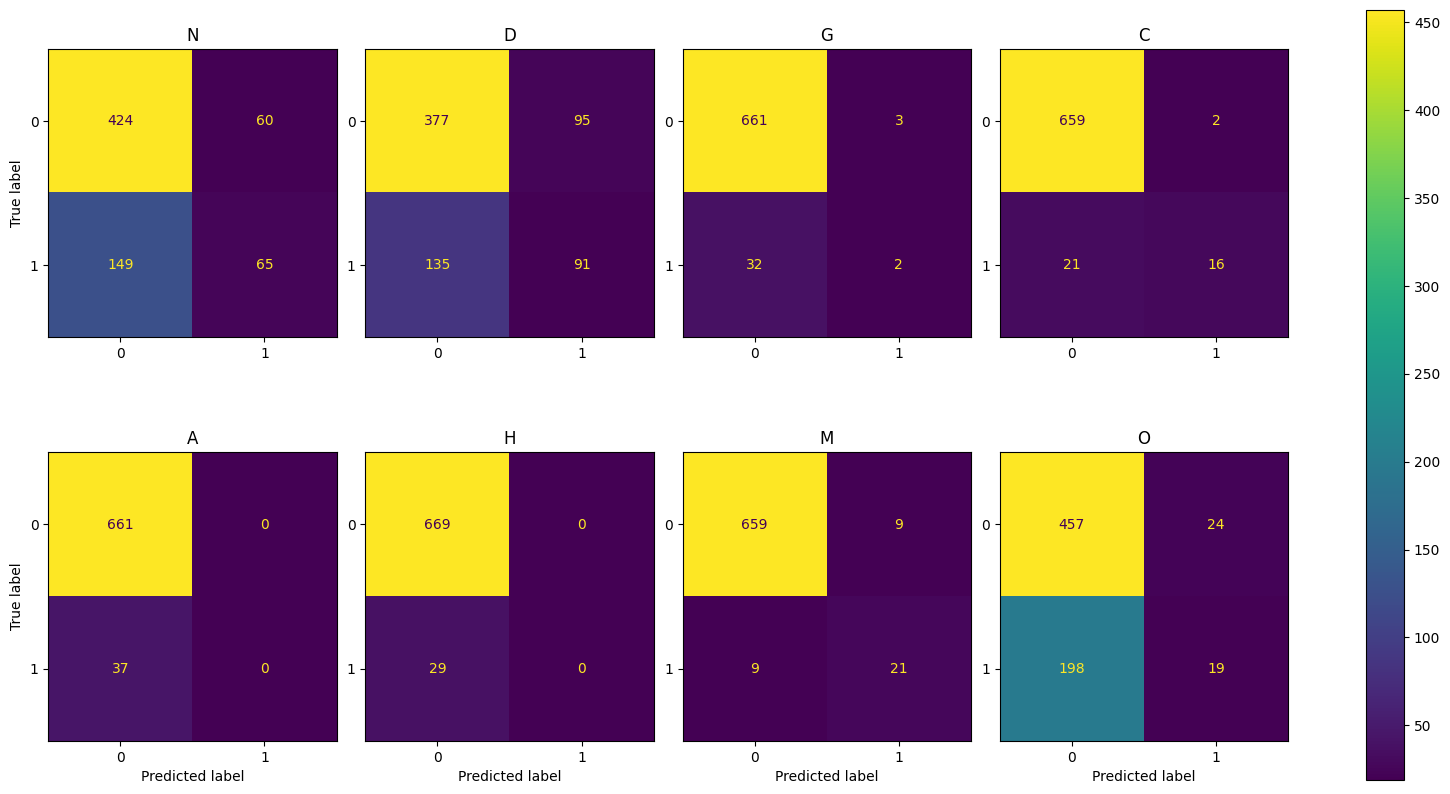

In [ ]:
from sklearn import metrics
os.chdir('../../scripts')
from metrics import plot_confusion_matrices
os.chdir('../experiments/experiment_12/')

# Print test classification report
print('Clasification report:')
print(
    metrics.classification_report(
        ground_truth,
        probs>0.5,
        output_dict=False,
        target_names=label_names,
        zero_division=0
    )
)

# Plot one confusion matrix for each label
plot_confusion_matrices(ground_truth, probs, label_names)

# Cualitative results
One patient with each disease (at least) is predicted. The original images are ploted along with their ground truth and predicted labels.

In [ ]:
import torch
from torchvision import transforms
os.chdir('../../scripts')
from utils import load_model
from predict import pred_and_plot_image
os.chdir('../experiments/experiment_12/')

In [ ]:
model = load_model(model_path)

test_df = pd.read_excel(test_annotations_path)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

device = 'cuda' if torch.cuda.is_available() else 'cpu'

[INFO] Created new resnet50_dual model.


You can run the next cell multiple times to see different results

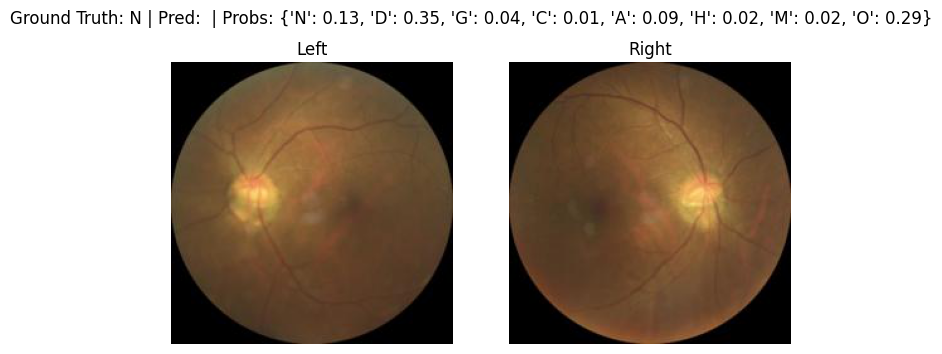

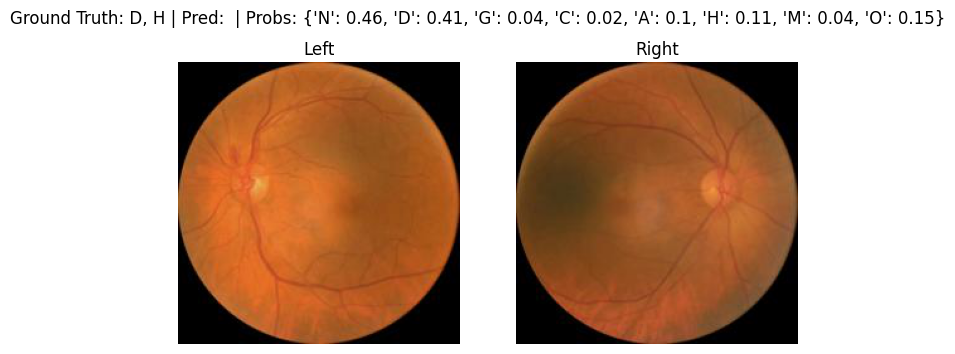

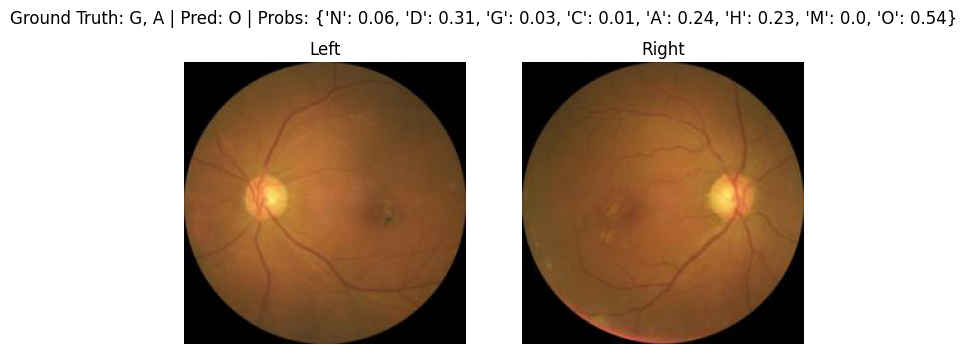

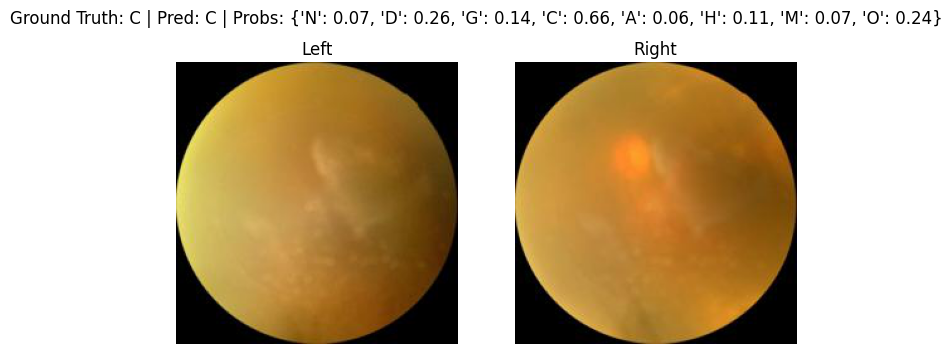

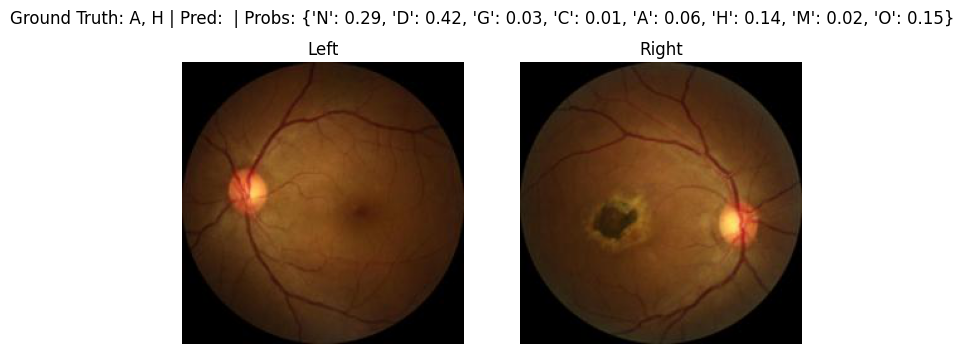

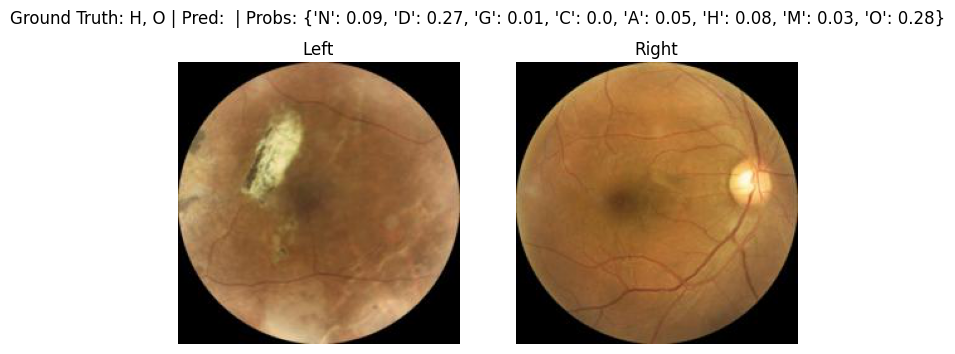

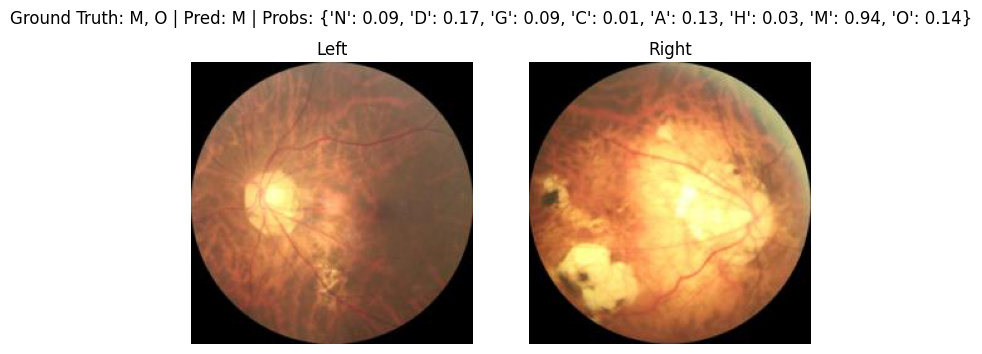

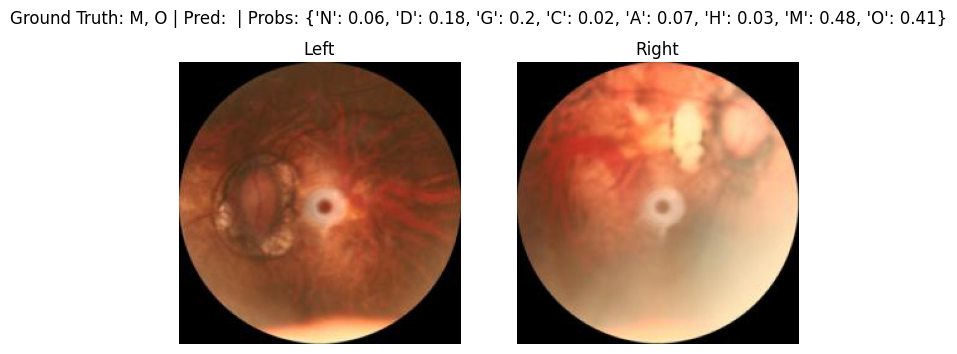

In [ ]:
for label in label_names:
    patient = test_df[test_df[label] == 1].sample(replace=True).reset_index(drop=True)
    pred_and_plot_image(model=model,
                        left_image_path=f'{images_path}/{patient.at[0, "Left-Fundus"]}',
                        right_image_path=f'{images_path}/{patient.at[0, "Right-Fundus"]}',
                        transform=transform,
                        device=device,
                        label_names=label_names,
                        ground_truth=patient.loc[0, label_names].to_numpy())

# Zip the experiment data folder, the SummaryWriter folder and the experiment outputs
This is necessary in order to be able to download this folders

In [ ]:
# import shutil

# shutil.make_archive('experiment_data_compressed',
#                     format="zip",
#                     root_dir='data/')

# shutil.make_archive('runs_compressed',
#                     format="zip",
#                     root_dir='../runs/')

# shutil.make_archive('outputs_compressed',
#                     format="zip",
#                     root_dir='outputs/')

'/content/ODIR-5K-multi-label-classification/experiments/experiment_12/outputs_compressed.zip'